# Randomized Image Sampling for Explanations (RISE)

In [10]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

## Change code below to incorporate your *model* and *input processing*

### Define your model here:

In [11]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras import backend as K

In [12]:
class Model():
    def __init__(self):
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)

### Load and preprocess image

In [13]:
from keras.preprocessing import image

In [14]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

---

## RISE

In [15]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [16]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

---

## Running explanations

In [17]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [18]:
model = Model()

In [19]:
img, x = load_img('goldfish.jpg')

In [20]:
N = 2000
s = 8
p1 = 0.5
masks = generate_masks(2000, 8, 0.5)

Generating masks: 100%|██████████| 2000/2000 [00:02<00:00, 917.35it/s]


In [21]:
sal = explain(model, x, masks)

Explaining:   0%|          | 0/20 [00:00<?, ?it/s]

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 507ms/step


Explaining:   5%|▌         | 1/20 [00:02<00:51,  2.74s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


Explaining:  10%|█         | 2/20 [00:03<00:30,  1.72s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step


Explaining:  15%|█▌        | 3/20 [00:04<00:23,  1.39s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step


Explaining:  20%|██        | 4/20 [00:05<00:19,  1.23s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


Explaining:  25%|██▌       | 5/20 [00:06<00:17,  1.15s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


Explaining:  30%|███       | 6/20 [00:07<00:15,  1.10s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


Explaining:  35%|███▌      | 7/20 [00:08<00:13,  1.07s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step


Explaining:  40%|████      | 8/20 [00:09<00:12,  1.05s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


Explaining:  45%|████▌     | 9/20 [00:10<00:11,  1.04s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step


Explaining:  50%|█████     | 10/20 [00:11<00:10,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step


Explaining:  55%|█████▌    | 11/20 [00:12<00:09,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step


Explaining:  60%|██████    | 12/20 [00:13<00:08,  1.02s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


Explaining:  65%|██████▌   | 13/20 [00:14<00:07,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step


Explaining:  70%|███████   | 14/20 [00:15<00:06,  1.02s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step


Explaining:  75%|███████▌  | 15/20 [00:16<00:05,  1.03s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step


Explaining:  80%|████████  | 16/20 [00:18<00:04,  1.06s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step


Explaining:  85%|████████▌ | 17/20 [00:19<00:03,  1.08s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step


Explaining:  90%|█████████ | 18/20 [00:20<00:02,  1.10s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


Explaining:  95%|█████████▌| 19/20 [00:21<00:01,  1.10s/it]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


Explaining: 100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


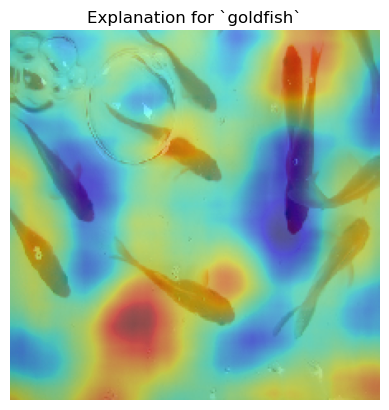

In [23]:
class_idx = 1
plt.title('Explanation for `{}`'.format(class_name(class_idx)))
plt.axis('off')
plt.imshow(img)
plt.imshow(sal[class_idx], cmap='jet', alpha=0.5)
# plt.colorbar()
plt.show()